In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [13]:
norm_df = pd.read_csv('E:\Online Courses, Internship and more\Recommendation system\city_ranking.csv')
norm_df.head()

,city,country,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
0,Berlin,Germany,4.8,9.0,6.2,5.2,7.2,7.1,3.9,5.0,4.9,6.9,7.5,8.4,7.8,9.7,10.0,7.0,8.0,7.14
1,Montréal,Canada,6.0,8.1,5.7,6.4,5.1,3.6,7.4,5.1,5.8,8.6,7.0,9.9,8.1,9.6,8.8,5.1,9.0,7.10
2,London,United Kingdom,6.6,9.8,9.8,0.5,2.2,7.2,4.4,4.7,10.0,9.5,7.1,8.7,9.6,9.4,9.4,2.5,7.5,6.71
3,Amsterdam,Netherlands,7.6,8.3,8.7,0.6,1.7,5.7,6.9,4.5,5.0,7.9,5.5,8.5,10.0,9.9,8.6,4.8,9.7,6.63
4,Toronto,Canada,6.3,9.5,4.4,2.7,6.1,4.3,7.4,7.1,5.2,8.6,7.0,9.9,9.4,9.8,4.5,3.6,9.4,6.60


Exporatory Data Analysis

In [14]:
# taking a look at the descriptive statistics 

df.describe()

,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,4.972727,4.994545,5.000000,5.000909,5.000909,4.304545,4.841818,4.992727,3.580000,7.210909,5.416364,7.236364,4.914545,5.000000,4.992727,5.067273,4.517273,5.125545
std,2.909646,2.931037,2.922705,2.922343,2.924101,2.232183,2.924850,2.925676,2.496706,1.982647,2.031429,2.408423,2.918302,2.922705,2.926585,2.926284,3.169026,0.780482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.210000
25%,2.500000,2.525000,2.525000,2.525000,2.525000,2.700000,1.900000,2.525000,1.000000,6.900000,4.100000,6.600000,2.525000,2.525000,2.525000,2.425000,0.700000,4.695000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,4.250000,4.400000,5.000000,3.500000,7.500000,5.250000,8.300000,5.000000,5.000000,5.000000,5.100000,4.400000,5.185000
75%,7.450000,7.475000,7.475000,7.475000,7.475000,6.000000,7.400000,7.475000,5.375000,8.400000,7.100000,8.700000,7.200000,7.475000,7.475000,7.475000,7.275000,5.632500
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.140000


Recommendation funtions

In [15]:
def from_city_cosSim(data, name):
    try:
        Xs = data[data.City == name].drop('City',1)
        Col_A = data[data.City != name].City
        Ys = data[data.City != name].drop('City',1)
        cosSim = cosine_similarity(X=Xs,Y=Ys)
        sim = list(cosSim[0])
        cty = list(Col_A)
        comb = {"City":cty,"Similarity":sim}
        dfdf = pd.DataFrame(comb).reset_index()
        # Adding a row with the Y City
        currCity = {"City":name,"Similarity":1}
        curr = pd.DataFrame(currCity, index=[0])
        # Concatenate to finalize DF
        dfdf = pd.concat([dfdf,curr], sort=False).reset_index(drop=True).drop('index',1)
        return(dfdf)
    except:
        print("Wrong input: this entry will be ignored")


In [16]:
def input_cities(numShow=10):
    # create class that defines cities
    class rated_city:
        def __init__(self, city):
            self.city = city
    
    #Loop to input cities based on the user
    add_city = True
    userInput = []
    w = 0
    while add_city == True:
        city_name = input("City (Include state - Ex. New York, NY): ")
        userInput.append(city_name)
        simSim = from_city_cosSim(data=norm_df, name=city_name)
        try:
            cosSim = cosSim.merge(simSim, how='inner', on='City')
        except:
            cosSim = simSim
        
        city = rated_city(city_name)
        cont = input("Do you want to include another city?")
        add_city = cont.lower() in ['yes','true','of course','y','si','1']
        w+=1
    
    simCols = cosSim.drop("City",1)
    cits = cosSim.City
        
    for i, row in simCols.iterrows():
        simCols.at[i,'SumVal'] = row.sum()/w
    simi = simCols.SumVal
    
    out = {"City":cits,"Score":simi}
    out = pd.DataFrame(out).set_index("City").drop(userInput)
    out = out.sort_values('Score', ascending=False)
    
    return out.head(numShow)

In [22]:
df = norm_df.groupby(['city']).mean()

In [23]:
df.head()

,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
city,,,,,,,,,,,,,,,,,,
Adelaide,5.0,0.9,3.9,3.9,5.5,2.8,5.6,1.9,3.9,7.3,5.2,9.3,6.9,4.8,5.4,6.6,2.8,4.90
Amsterdam,7.6,8.3,8.7,0.6,1.7,5.7,6.9,4.5,5.0,7.9,5.5,8.5,10.0,9.9,8.6,4.8,9.7,6.63
Antwerp,6.2,2.5,1.7,7.8,1.0,4.6,3.5,5.5,1.0,8.9,5.6,7.4,6.1,6.1,7.7,5.7,4.4,5.28
Athens,0.5,4.4,7.0,8.3,6.9,6.3,5.6,1.2,1.8,1.3,3.3,3.2,0.1,0.7,7.9,6.3,0.7,4.03
Auckland,7.2,6.1,2.8,4.5,6.2,2.8,5.4,3.0,4.2,7.5,8.1,10.0,7.9,6.6,3.5,3.2,2.8,5.64


In [35]:
df.describe()

,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,4.972727,4.994545,5.000000,5.000909,5.000909,4.304545,4.841818,4.992727,3.580000,7.210909,5.416364,7.236364,4.914545,5.000000,4.992727,5.067273,4.517273,5.125545
std,2.909646,2.931037,2.922705,2.922343,2.924101,2.232183,2.924850,2.925676,2.496706,1.982647,2.031429,2.408423,2.918302,2.922705,2.926585,2.926284,3.169026,0.780482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.210000
25%,2.500000,2.525000,2.525000,2.525000,2.525000,2.700000,1.900000,2.525000,1.000000,6.900000,4.100000,6.600000,2.525000,2.525000,2.525000,2.425000,0.700000,4.695000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,4.250000,4.400000,5.000000,3.500000,7.500000,5.250000,8.300000,5.000000,5.000000,5.000000,5.100000,4.400000,5.185000
75%,7.450000,7.475000,7.475000,7.475000,7.475000,6.000000,7.400000,7.475000,5.375000,8.400000,7.100000,8.700000,7.200000,7.475000,7.475000,7.475000,7.275000,5.632500
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.140000


Visualizing the distributions of the variables

Data Visualization

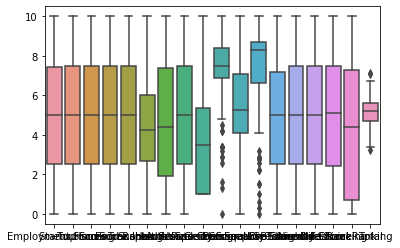

In [43]:
sns.boxplot(data = df)